# Predicting the Survival of Titanic Passengers

https://www.kaggle.com/c/titanic/

https://www.kaggle.com/arshid/titanic-machine-learning-from-disaster-solution

https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

### Importing the Libraries

In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Getting the Data

In [29]:
df_train = pd.read_csv('./train.csv', sep=',')
df_test = pd.read_csv('./test.csv', sep=',')

### Data Exploration/Analysis

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

In [33]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


Visualizing the null values using HeatMaps

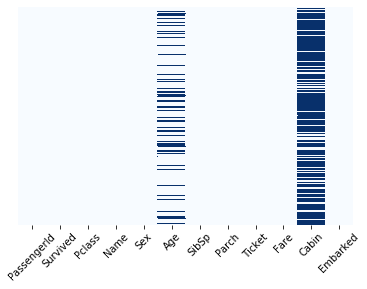

In [34]:
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

Plotting on the bases of the Age of the Passengers

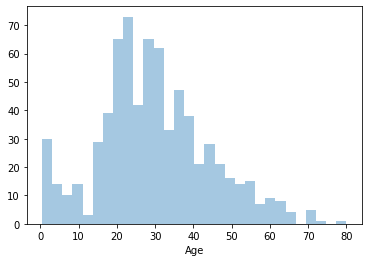

In [35]:
#dropna() -> Remove missing values
sns.distplot(df_train['Age'].dropna(), kde=False, bins=30)
plt.show()

Getting the Age of the Passengers on the basis of their Class, also the average Age per class

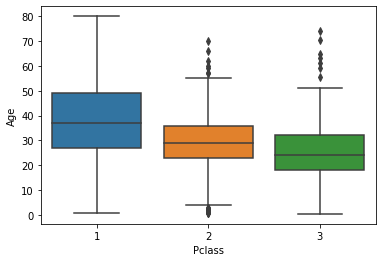

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.show()

Plot distributions of age of passengers who survived or did not survive

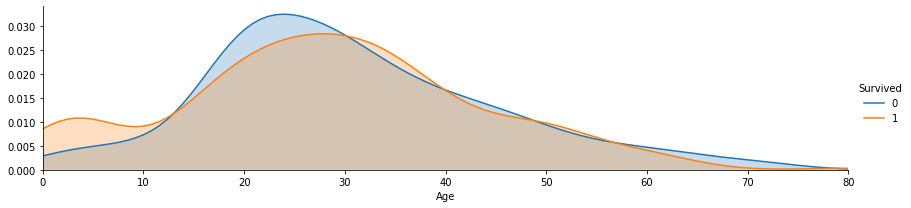

In [37]:
a = sns.FacetGrid(df_train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, df_train['Age'].max()))
a.add_legend()
plt.show()

Histogram comparison of sex, class, and age by survival

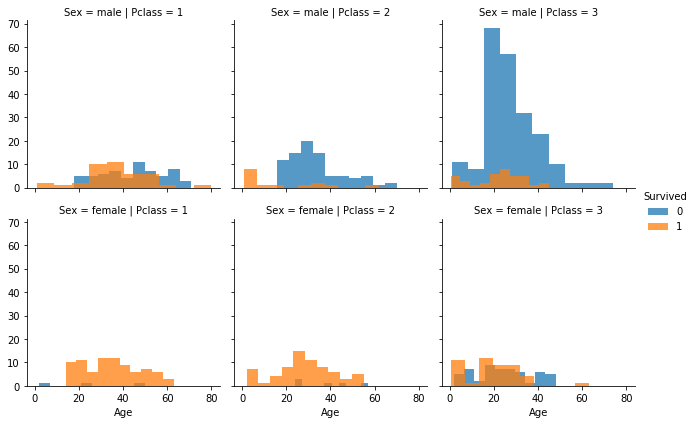

In [38]:
h = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()
plt.show()

Correlation heatmap of dataset

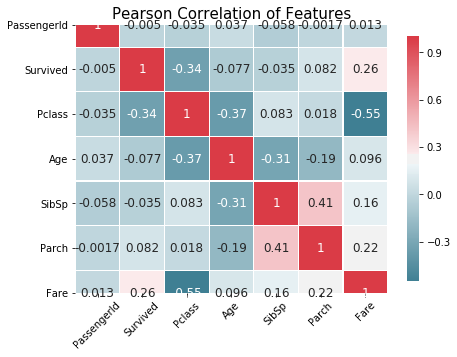

In [39]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(7, 5))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9}, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.xticks(rotation=45)
    plt.show()

correlation_heatmap(df_train)

Puts the average age where the values are empty

In [40]:
#data['Age'].isnull().values.any()
index_age = df_train[df_train['Age'].isnull()].index
df_train.loc[index_age, 'Age'] = np.mean(df_train['Age'])

Dropping the Cabin column since it doesn't have any direct effect on the prediction

In [41]:
df_train = df_train.drop('Cabin', axis=1)

Dropping the remaining rows with null values in them

In [42]:
#df_train.dropna(inplace=True)

### Dealing with categorical column, using LabelEncoder

In [43]:
le_age = LabelEncoder()
label_age = le_age.fit_transform(df_train['Sex'])
df_train.loc[:, 'Sex'] = label_age

In [44]:
index_embarked = df_train[df_train['Embarked'].isnull()].index
df_train.loc[index_embarked, 'Embarked'] = 'S'

In [45]:
le_embarked = LabelEncoder()
label_embarked = le_embarked.fit_transform(df_train['Embarked'])
df_train.loc[:, 'Embarked'] = label_embarked

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


### Removing columns

In [47]:
y_train = df_train['Survived']
df_train = df_train.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])

x_train = df_train.values
#scaler = MinMaxScaler(feature_range=(0, 1))
#X = scaler.fit_transform(X)
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Test Data

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
index_age = df_test[df_test['Age'].isnull()].index
df_test.loc[index_age, 'Age'] = np.mean(df_test['Age'])

label_age = le_age.transform(df_test['Sex'])
df_test.loc[:, 'Sex'] = label_age

index_embarked = df_test[df_test['Embarked'].isnull()].index
df_test.loc[index_embarked, 'Embarked'] = 'S'

label_embarked = le_embarked.transform(df_test['Embarked'])
df_test.loc[:, 'Embarked'] = label_embarked

index_fare = df_test[df_test['Fare'].isnull()].index
df_test.loc[index_fare, 'Fare'] = np.mean(df_test['Fare'])

PassengerId = df_test['PassengerId']
df_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
x_test = df_test.values
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


### Classification (Holdout)

In [50]:
n_iter = 10
scores_list = []
for i in range(n_iter):
    x_train_aux, x_test_aux, y_train_aux, y_test_aux = train_test_split(x_train, y_train, test_size=0.2)
    model_ = RandomForestClassifier(n_estimators=70)
    model_.fit(x_train_aux, y_train_aux)
    y_pred = model_.predict(x_test_aux)
    scores = accuracy_score(y_pred, y_test_aux)
    scores_list.append(scores)

print('Iterations: {:d}'.format(n_iter))
print('Mean Accuracy: {:.3f}'.format(np.mean(scores_list)*100))
print('Minimum Accuracy: {:.3f}'.format(np.amin(scores_list)*100))
print('Maximum Accuracy: {:.3f}'.format(np.amax(scores_list)*100))
print('Std Accuracy: {:.3f}'.format(np.std(scores_list)))

Iterations: 10
Mean Accuracy: 79.050
Minimum Accuracy: 74.302
Maximum Accuracy: 82.123
Std Accuracy: 0.022


### Training and Predicting

In [51]:
model = RandomForestClassifier(n_estimators=70)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Writing the predictions to a csv file

In [52]:
dict_ = dict(PassengerId=PassengerId, Survived=y_pred)
df = pd.DataFrame(dict_).reset_index()
df = df.drop('index', axis=1)

df.to_csv('result.csv', index=False)

In [53]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
